<a href="https://colab.research.google.com/github/ZsofiaK/masterthesis/blob/main/Implementation/Setup_AK_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Animal Kingdom dataset

**The following steps are included in this notebook:**
1. Extracting the AK AR video dataset.
2. Selecting relevant videos (fish and fish attacks) based on list compiled during EDA.
3. Copying relevant videos to dedicated data folder on Drive.
4. Compiling dataframe containing metadata on videos (label, fps, length) and storing it in Drive.
5. Data description steps (property distributions).

`PLEASE NOTE` that it is a prerequisite of this notebook to have already gained access to the Animal Kingdom dataset on Google Drive.

## Extracting the dataset

In [1]:
# Mounting Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Specifying source and destination directories.

import os

source_path = '/content/drive/My Drive/UvA/M Thesis/Data/Animal Kingdom/video.tar.gz'

destination_folder = '/content/Videos'

# Create the destination folder if it does not exist
os.makedirs(destination_folder, exist_ok=True)

In [3]:
# Extract videos.

import tarfile

with tarfile.open(source_path, 'r:gz') as file:
    file.extractall(path=destination_folder)

    print("Extraction completed.")

Extraction completed.


## Selecting relevant videos

In [ ]:
# Copy fish metadata from Drive.
import shutil

metadata_source = '/content/drive/My Drive/UvA/M Thesis/Data/AK fish/clips.csv'

metadata_dest = '/content/clips.csv'

shutil.copy(metadata_source, metadata_dest)

In [6]:
# Load metadata table.
import pandas as pd

clips_df = pd.read_csv(metadata_dest)

clips_df.head()

,S/N,video_id,type,list_animal_action,label
0,11,AAFWRPDI,train,"[('Fish', 'Swimming')]",0
1,18,AAJNFNXN,train,"[('Fish', 'Swimming'), ('Orca', 'Swimming')]",0
2,42,AATNWZAA,train,"[('Fish', 'Swimming'), ('Fish', 'Sensing')]",0
3,97,ACFCJUPH,train,"[('Catfish', 'Swimming')]",0
4,124,ADBJMPIF,train,"[('Sardine', 'Fleeing'), ('Sea Lion', 'Eating'...",1


In [7]:
# Setting up directory for relevant fish videos.
source_folder = '/content/Videos/video'
destination_folder = '/content/Clips'

# Create the destination folder if it does not exist
os.makedirs(destination_folder, exist_ok=True)

In [10]:
# Loop through the video IDs and move each relevant video file to new directory

from IPython.display import clear_output

not_found_videos = 0

progress = 0

nr_videos = len(clips_df)

for video_id in clips_df['video_id']:
    source_file = os.path.join(source_folder, f"{video_id}.mp4")

    destination_file = os.path.join(destination_folder, f"{video_id}.mp4")

    # Check if the file exists before trying to move
    if os.path.exists(source_file):
        shutil.move(source_file, destination_file)

    else:
        not_found_videos += 1

    progress += 1
    clear_output(wait=True)
    print(f'Progress: {progress / nr_videos * 100:.2f}%')

Progress: 100.00%


In [11]:
# Checking if all relevant videos were found.

if not_found_videos > 0:
  print(f'WARNING: {not_found_videos} not found.')

else:
  print('Successfully moved relevant videos!')

Successfully moved relevant videos!


## Copying relevant videos to data folder in Drive.

In [12]:
# Copying relevant videos to dedicated data folder on Drive.
clips_source = '/content/Clips'

drive_dest = '/content/drive/My Drive/UvA/M Thesis/Data/AK fish/Clips'

os.makedirs(drive_dest, exist_ok=True)

shutil.copytree(clips_source, drive_dest, dirs_exist_ok=True)

'/content/drive/My Drive/UvA/M Thesis/Data/AK fish/Clips'

## Inspecting length and temporal resolution of videos

In [13]:
# Defining helper function.

import cv2

def get_video_properties(video_path):
  '''
  Returns the number of frames and frames per second for a video.
  '''

  cap = cv2.VideoCapture(video_path)

  if not cap.isOpened():    # If the video cannot be opened.
      return None, None

  nr_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  fps = cap.get(cv2.CAP_PROP_FPS)

  cap.release()

  return nr_frames, fps

In [15]:
# Collecting number of frames and fps for each video.

clips_path = '/content/Clips'

# Initialize lists to store the data
frame_counts = []
fps_values = []

progress = 0
nr_videos = len(clips_df)

# Iterate over each row in the DataFrame
for idx, row in clips_df.iterrows():
    video_file = f"{clips_path}/{row['video_id']}.mp4"

    nr_frames, fps = get_video_properties(video_file)

    # Append the results
    frame_counts.append(nr_frames)
    fps_values.append(fps)

    progress += 1

    clear_output(wait=True)
    print(f'Progress: {progress / nr_videos * 100:.2f}%')

Progress: 100.00%


In [16]:
# Updating metadata table with these.
clips_df['nr_frames'] = frame_counts
clips_df['fps'] = fps_values

In [18]:
# Checking if any videos could not be processed.

unprocessed = clips_df['nr_frames'].isna()

if sum(unprocessed) > 0:
  print(f'WARNING: {sum(unprocessed)} videos could not be processed.')

else:
  print('Success! All videos processed.')

Success! All videos processed.


In [19]:
# Adding length of video (in seconds) to metadata table.
clips_df['length'] = clips_df['nr_frames'] / clips_df['fps']

In [20]:
# Writing table to csv.
clips_df.to_csv('/content/clips.csv', index=False)

In [21]:
# Copying metadata table to Drive.

metadata_source = '/content/clips.csv'

metadata_dest = '/content/drive/My Drive/UvA/M Thesis/Data/AK fish/clips.csv'

shutil.copy(metadata_source, metadata_dest)

'/content/drive/My Drive/UvA/M Thesis/Data/AK fish/clips.csv'

## Inspecting video property distributions.

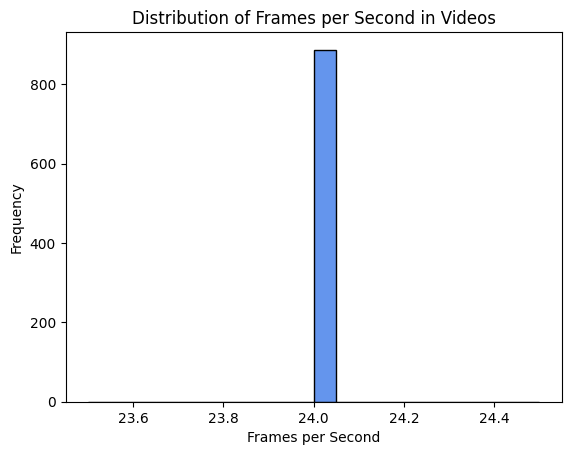

In [25]:
# Distribution of the fps of videos.

import matplotlib.pyplot as plt

plt.hist(clips_df['fps'], color='cornflowerblue', edgecolor='black', bins=20)

# Adding titles and labels
plt.title('Distribution of Frames per Second in Videos')
plt.xlabel('Frames per Second')
plt.ylabel('Frequency')

# Show the plot
plt.show()

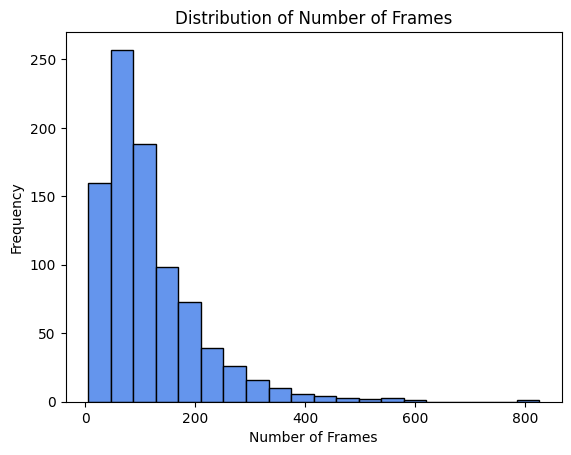

In [24]:
# Distribution of the number of frames in a video.

import matplotlib.pyplot as plt

plt.hist(clips_df['nr_frames'], color='cornflowerblue', edgecolor='black', bins=20)

# Adding titles and labels
plt.title('Distribution of Number of Frames')
plt.xlabel('Number of Frames')
plt.ylabel('Frequency')

# Show the plot
plt.show()

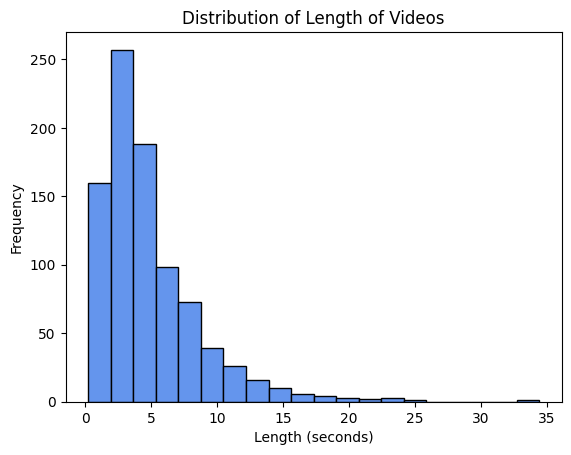

In [26]:
# Distribution of the length of videos.

import matplotlib.pyplot as plt

plt.hist(clips_df['length'], color='cornflowerblue', edgecolor='black', bins=20)

# Adding titles and labels
plt.title('Distribution of Length of Videos')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()